Título: Lunar Lander

O objetivo é treinar um agente para pousar na lua utilizando um algoritmo de Q-Learning . Este ambiente é um problema clássico de otimização de trajetória de foguete. De acordo com o princípio máximo de Pontryagin, é ideal ligar o motor a toda velocidade ou desligá-lo. Esta é a razão pela qual este ambiente possui ações discretas: ligar ou desligar o motor.

Barema:
- Uso dos recursos do gymnasium (peso 2)
- Implementaçao da função de Q-Learning (peso 3)
- CrIar uma interface para a visualização do treinamento(peso 2)
- Fazer uma análise dos resultados atraves de um gráfico recompensa X episódio (peso 2)
- clareza do código (peso 1)

Atribuição de nota:
Não deu a largada (0 - 4); No caminho (4,1 - 7); Chegou lá (7,1 - 9); Foi mais longe (9,1 - 10)"
Entrega: código python  no github.

In [ ]:
!pip install gymnasium
!pip install -q swig
!pip install -q gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install matplotlib


In [ ]:
import shutil
import os

video_folder = "videos/lunar_lander"

if os.path.exists(video_folder):
    shutil.rmtree(video_folder)

os.makedirs(video_folder, exist_ok=True)



Uso dos recursos do gymnasium

In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import matplotlib.pyplot as plt
import numpy as np

env = gym.make("LunarLander-v2", render_mode='rgb_array')

env = RecordVideo(env, video_folder="videos/lunar_lander", episode_trigger=lambda episode: True)

observation, info = env.reset(seed=11)



/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/videos/lunar_lander folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Implementação Q Learning

In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import matplotlib.pyplot as plt
import numpy as np


def discrete(observacao, discrete_obs):
    discrete = list()
    for i, val in enumerate(observacao):
        discrete.append(np.digitize(val, np.linspace(-1, 1, discrete_obs[i])) - 1)
    return tuple(discrete)


episodios = 1000
taxa_de_aprendizado = 0.1
fator_de_desconto = 0.99
epsilon = 1.0
min_epsilon = 0.01
discount_epsilon = 0.995

discrete_obs = (20, 20, 20, 20, 20, 20, 4, 4)

table_format = list(discrete_obs) + [env.action_space.n]

q_table = np.zeros(table_format)

rewards = []

for episodio in range(episodios):
    recompensa_total = 0
    state = discrete(env.reset()[0], discrete_obs)
    done = False

    while not done:
      # E Greedy, epsilon é decrementado ao longo do tempo
        if np.random.random() < epsilon:
            acao = env.action_space.sample()
        else:
            acao = np.argmax(q_table[state])

        next_state, reward, terminated, truncated, info = env.step(acao)
        recompensa_total += reward
        next_state = discrete(next_state, discrete_obs)

        # Atualização da tabela
        valor_antigo = q_table[state + (acao,)]
        proximo_maximo = np.max(q_table[next_state])
        novo_valor = (1 - taxa_de_aprendizado) * valor_antigo + taxa_de_aprendizado * (reward + fator_de_desconto * proximo_maximo)
        q_table[state + (acao,)] = novo_valor

        state = next_state

        done = terminated or truncated

    rewards.append(recompensa_total)

    if epsilon > min_epsilon:
        epsilon *= discount_epsilon




Interface para a visualização do treinamento

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

pasta_de_videos = "videos/lunar_lander"
arquivos_de_video = [os.path.join(pasta_de_videos, nome) for nome in sorted(os.listdir(pasta_de_videos))]

html_str = ""
for caminho_do_video in arquivos_de_video:
    video_encoded = b64encode(open(caminho_do_video, "rb").read())
    html_str += f'<video width="320" height="240" controls><source src="data:video/mp4;base64,{video_encoded.decode()}" type="video/mp4"></video><br>'

HTML(data=html_str)

**Análise dos resultados atraves de um gráfico recompensa X episódio**

O gráfico apresenta uma grande variabilidade na recompensa total entre os episódios. O que indica que o agente ainda está explorando o espaço de ação e não convergiu para uma política estável. A recompensa recebida por episódio não mostra um aumento consistente conforme o número de episódios aumenta. Acredito que treinar por mais tempo não seja a solução. Uma abordagem que poderia melhorar seria melhorar a forma com que transformei o espaço contínuo em discreto para utilização do Q Learning e ajustar mais o hiperparametros. Para finalizar, acredito que a melhor solução seria a utilização do Deep Q Network, pois ambientes complexos como Lunar Lander funcionam melhor com métodos de aprendizado profundo.





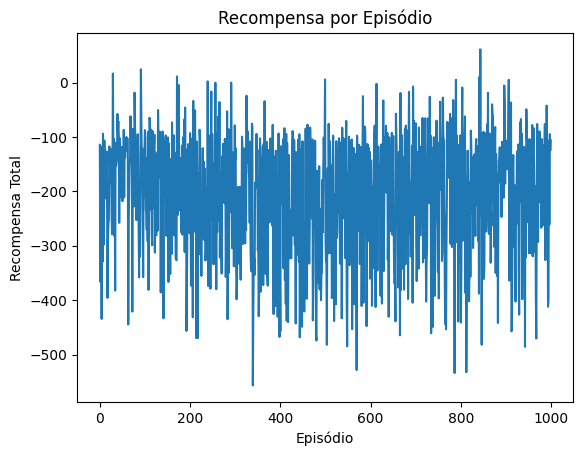

In [ ]:
plt.plot(rewards)
plt.title('Recompensa por Episódio')
plt.xlabel('Episódio')
plt.ylabel('Recompensa Total')
plt.show()